# Exploratory Data Analysis on World Population Growth 
## Margad Bayarmagnai

## Acknowledgements: 
<i> This project uses raw data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed over time. Gapminder collects data from many sources and compiles them into tables that describe many countries around the world, their goal is "to compile all public statistics; Social, Economic and Environmental; into a comoparable total dataset." All data sets in this project are directly sources from the Systema Globalis without any changes. This project was repurposed from a Data 8 Spring 2021 class project at UC Berkeley for the purpose of providing as a writing and data visualization sample. <i>

In [1]:
from datascience import * 
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight') 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Summary: 

The aim of this project is to delve into the various factors that play into population growth and how the world's population has changed over time as a whole. We start by exploring population growth in Bangladesh, exploring the dynamics like: fertility, life expectancy, and child mortality. Also taking into consideration environmental factors like environmental disasters that could have a short-term effect on population growth. Takeaways from this data exploration can inform policies, interventions, and strategies aimed at addressing demographic changes, improving healthcare, and promoting sustainable development worldwide. 

In [2]:
# total population of each country over time: 

pop = Table.read_table('population.csv')
pop.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


### Exploring Population Growth in Bangladesh: 

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

<i> The data for this project was downloaded in February 2017 <i> 

In [3]:
b_pop = pop.where('geo', are.containing('bgd')).drop('geo').where('time', are.between(1970, 2017))
b_pop
b_pop.set_format('population_total', NumberFormatter) 

five = np.arange(1970, 2021, 5) 
b_five = b_pop.sort('time').where('time', are.contained_in(five))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


In [4]:
b_pop.set_format('population_total', NumberFormatter) 

five = np.arange(1970, 2021, 5) 
b_five = b_pop.sort('time').where('time', are.contained_in(five))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


The `b_five` table shows the population in Bangladesh every five years. From first glance, it appears that the population has been growing quickly. 

In order to understand population growth, we must take into consideration a variety of factors. While the population seems to have been growing at first glance, we should explore the annual growth rate over time in Bangladesh. To do so, I first created an array called `initial` that contains the population from every 5 year interval from 1970 to 2015. Then, I created another array called `changed` that contains the population for every 5 year interval from 1975 to 2020. I used the `b_five` table from above to create both arrays by filtering the table to only contain the relevant years. 

The formula for annual growth rate over time was provided by the project guidelines. It is: $$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

In [5]:
#population growth for bangladesh 
b_1970_thru_2010 = b_five.take(np.arange(0,9))

initial = b_five.column(1).take(np.arange(0,9))
changed = b_five.column(1).take(np.arange(1,10))

five_yr_growth_rate = (changed / initial) - 1
annual_growth = (five_yr_growth_rate + 1) ** (1/5) - 1

b_five_growth = b_1970_thru_2010.with_column('annual_growth', annual_growth)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"64,232,486",1.75%
1975,"70,066,310",2.59%
1980,"79,639,498",2.65%
1985,"90,764,180",2.60%
1990,"103,171,957",2.22%
1995,"115,169,933",2.08%
2000,"127,657,862",1.72%
2005,"139,035,505",1.20%
2010,"147,575,433",1.15%


From the table above, we can see that **while the population has grown every 5 years since 1970**, the **annual growth rate has decreased from 1985 to 2005**. There are a variety of factors that could affect this, this poses the question - what could be a possible explanation for this? 

To explore this further, let's take into consideration factors like life expectancy (`life_expectancy`), child mortality(`child mortality`), and fertility (`fertility`): 

In [6]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The life_expectancy table contains a statistic that is often used to measure how long people live, called life expectancy at birth. This number for a country in a given year, does **not** measure how long babies born in that year are expected to live. RATHER, it measures how long someone would live, on average, if the mortality conditions in that year persisted throughout their lifetime. These mortality conditions describe what fraction of people at each age survived the year. **It is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.**

In [7]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [8]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


To explore the unique population growth in Bangladesh, let's take into consideration whether the population is growing more slowly because people are not living as long. To do this, I used the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis to visualize how *life expectancy at birth* has changed in Bangladesh. 

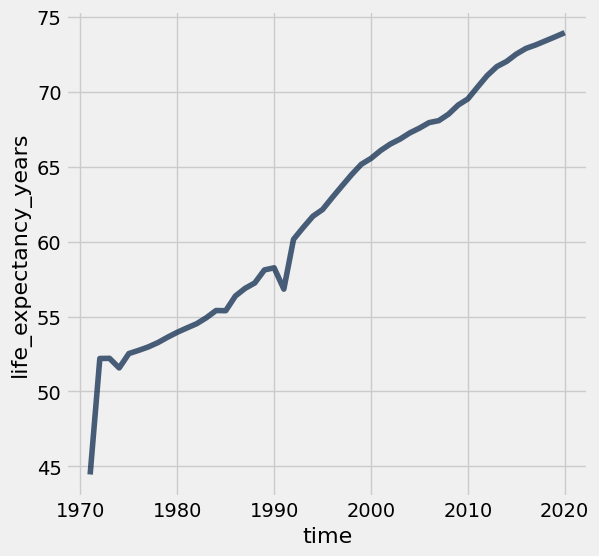

In [9]:
life_expectancy.where('geo', 'bgd').where('time', are.above(1970)).plot('time', 'life_expectancy_years')

Under the assumption that other variables stayed constant, do the trends in life expectancy in the graph above directly explain why the population growth decreased from 1985 to 2015 in Bangladesh? 

The life expectancy table above shows that there was actually an increase in life expectancy from 1985 to 2010, however it is important to note that the graph does not tell us anything about the number of newborn babies that will contribute to the changed population. There are a variety of complex factors that influence population growth. 

It is of note that there was a cyclone in Bangladesh in 1991. This cyclone may have influenced population growth in the short-term however there are other variables at play that play a significant role in determining the population growth rate, factors like fertility rates, mortality rates, immigration, emigration, and various socioeconomic and cultural factors. The short term effect on population growth from this cyclone is shown in the table above.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

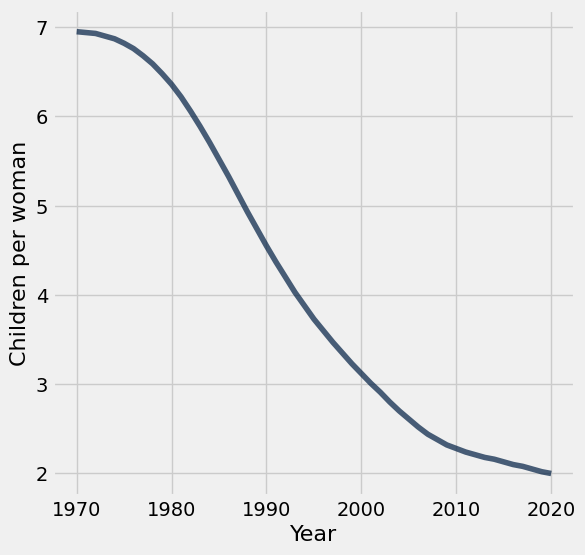

In [10]:
#The function `fertility_over_time` takes the Alpha-3 code of a country as `country_code` and a `start` year. 
#It returns a two-column table with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. 

def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', country_code).where('time', are.above_or_equal_to(start))
    country_fertility_after_start = country_fertility.where('time', are.above_or_equal_to(start))
    cleaned_table = country_fertility_after_start.select('time', 'children_per_woman_total_fertility').relabel('time', 'Year').relabel('children_per_woman_total_fertility', 'Children per woman')
    return cleaned_table

bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) 


Assuming everything else is constant, the trends in fertility in the graph avove do not directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh as it shows that the fertility rate has been decreasing since 1970. 

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

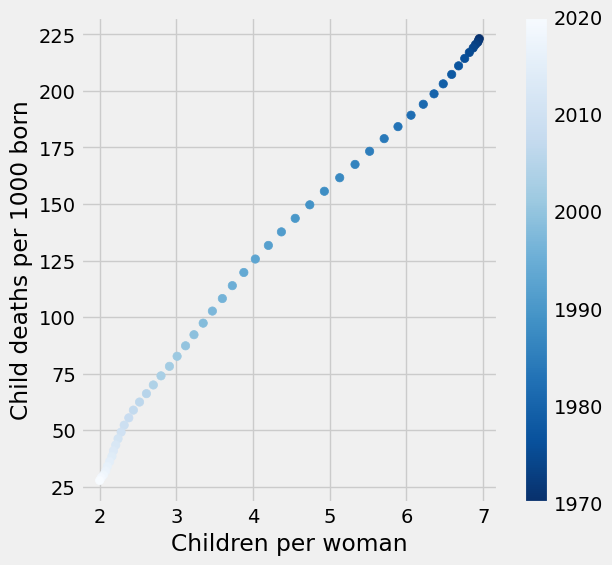

In [11]:
bgd_fertility = fertility.where('geo', 'bgd')
bgd_child_mortality = child_mortality.where('geo', 'bgd')
fertility_and_child_mortality = bgd_fertility.join('time', bgd_child_mortality, 'time').drop('geo').relabel('children_per_woman_total_fertility', 'Children per woman').relabel('child_mortality_under_5_per_1000_born', 'Child deaths per 1000 born')
post_1969_fertility_and_child_mortality = fertility_and_child_mortality.where('time', are.above(1969))

x_births = post_1969_fertility_and_child_mortality.column("Children per woman")
y_deaths = post_1969_fertility_and_child_mortality.column("Child deaths per 1000 born")
time_colors = post_1969_fertility_and_child_mortality.column("time")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.

The scatter diagram demonstrates a correlation, indicating that a decrease in child mortality rates is correlated with fewer children per woman: Reductions in child mortality used to be regarded as a key trigger for the fertility transition (it reduces the 'demand' for children by improving the chance of survival to adulthood), and although this is no longer seen as a hard-and fast causal link, there are analyses that strongly suggest that continuining high rates of infant and child mortality are signficant barriers to fertility decline (like) in Sub-Saharan Africa (e.g. Bongaarts 2008). 

Of course, there are other variables at play here that supplement the lower rates of children per woman. For instance, access to birth control and contraceptives, and healthcare infrastructure. 

### On a larger scale:

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

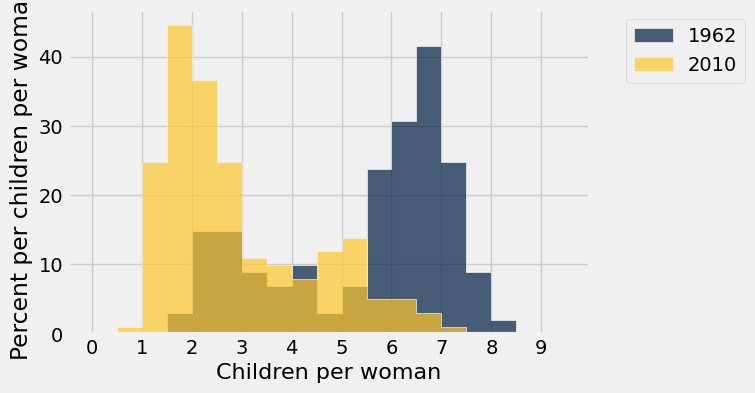

In [12]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))

The two overlaid histograms, one for 1962 and one for 2010, show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table. From these histograms we can infer that: about the same number of countries had a fertility rate between 3.5 and 4.5 in both 1962 and 2010, at least half of countries had a fertility rate between 5 and 8 in 1962, in 2010, about 40% of countries had a fertility rate between 1.5 and 2, and at least half of countries had a fertility rate below 3 in 2010.

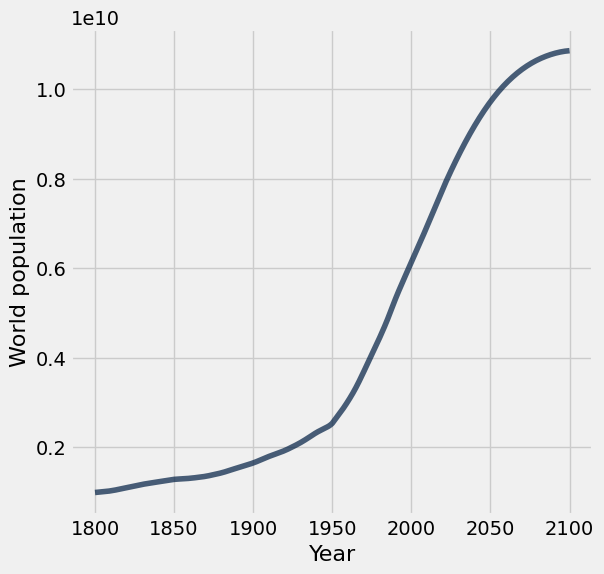

In [13]:
# World population from 1800 - 2020: 

world_population = pop.select('time', 'population_total').group('time', sum).relabel('time', 'Year').relabel('population_total sum', 'World population')
world_population.plot(0, 1)

I created a function `stats_for_year` that takes a `year` and returns a table of statistics - the table has 4 columns: `geo` which contains the three letter country code, `population_total` which contains the total population amount, `children_per_woman_total_fertility` which contains the fertility rate, and `child_mortality_under_5_per_1000_born` which contains child mortality for that year. This information is taken from the `population`, `fertility`, and `child_mortality` tables. The output only returns rows in which all three statistics are available for the country and year. 

<i> The output is also restricted to country codes that appear in `big_50`, an array of the 50 most populous countries in 2020. This is for computations later in the project. 

In [14]:
big_50 = pop.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = pop.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    return p.join('geo', f, 'geo').join('geo', c, 'geo')

Below is a demonstration of the function on the year 2020: 

In [15]:
stats_for_2020 = stats_for_year(2020)
stats_for_2020

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,38928341,4.04,58.08
ago,32866268,5.41,72.29
arg,45195777,2.23,9.4
bgd,164689383,2,27.7
bra,212559409,1.67,13.47
can,37742157,1.56,4.89
chn,1439323774,1.65,8.09
cod,89561404,5.72,84.53
col,50882884,1.78,13.48
deu,83783945,1.49,3.24


Then I created a table called `pop_by_decade` which contains two columns called `decade` and `population`. It contains a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. The `population` column contains the total population of all countries included in the result of the `stats_for_year(year` function for the first `year` of the decade. 
<i> It is important to note that the population statistics are based on the top 50 populations as defined by the `stats_for_year` function, this is to speed up computations later on. 

In [16]:
def pop_for_year(year):
    """Return the total population for the specified year."""
    return sum(stats_for_year(year).column('population_total'))
    
#population by decade: 
decades = Table().with_column('decade', np.arange(1960, 2021, 10))

pop_by_decade = decades.with_column('population', decades.apply(pop_for_year, 'decade'))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. 

I created a table called `region_counts`. It contains two columns called `region` and `count`. The `region` column contains regions of the world, and the `count` column contains the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

In [17]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(pop.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')
stats_for_2020 = stats_for_year(2020)

#Regions of the world and the number of countries in each region: 
region_counts = countries.where('country', are.contained_in(stats_for_2020.column('geo'))).group('world_6region').relabel('count', 'count').relabel('world_6region', 'region')
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. 

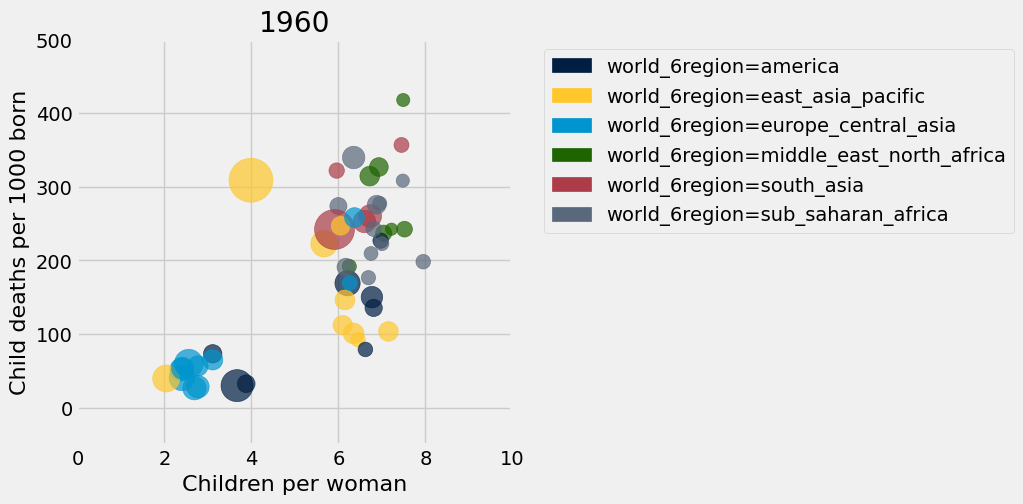

In [18]:
from functools import lru_cache as cache
@cache(None)

def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

### From this scatter diagram we can interpret: 

#### As a whole, the `europe_central_asia` region had the lowest child mortality rate:

The scatter diagram provides a comprehensive overview of child mortality rates across various regions and countries. It is evident that, as a whole, the 'europe_central_asia' region consistently maintained one of the lowest child mortality rates among all regions depicted in the plot. This is a notable observation, suggesting that this region has been successful in reducing child mortality and ensuring child well-being.

#### The lowest child mortality rate of any country was from an `east_asia_pacific` country:

While the 'europe_central_asia' region exhibited low child mortality rates on average, it is crucial to recognize that the scatter diagram reveals an exceptional case within the 'east_asia_pacific' region. Specifically, it identifies a country in the 'east_asia_pacific' region that boasts the lowest child mortality rate among all the countries represented. This exceptional case underscores the potential for progress in child health and healthcare systems within certain countries.

#### There is an association between child mortality and fertility: 

One of the most compelling insights derived from the scatter diagram is the association between child mortality and fertility. This association is readily discernible through the pattern of data points in the scatter plot. As child mortality rates increase, there is a tendency for fertility rates to be higher as well. Conversely, when child mortality rates decrease, fertility rates often exhibit a corresponding decline.

This observation aligns with demographic theories, such as the [demographic transition theory](https://ourworldindata.org/demographic-transition), which states that as societies progress economically and socially, both child mortality and fertility rates tend to decrease. This association between child mortality and fertility underscores the connection between health outcomes and family planning decisions within populations.

#### In summary:
The scatter diagram provides valuable insights into the relationship between child mortality, regional disparities, and fertility rates. It highlights both the successes in reducing child mortality in regions like `europe_central_asia` and the potential for progress within specific countries, as seen in the `east_asia_pacific` region. Furhtermore, the observed association between child mortality and fertility underscores the importance of addressing healthcare access, maternal and child health initiatives, and family planning in promoting healthier societies.

**Below** is an interactive visualization, which shows how countries have changed over time. Some findings from this graph is that 
Drag the slider to the right to see how countries have changed over time. You can see that the distinction between "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

In [19]:
import ipywidgets as widgets

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…